# Design of Digital Filters

*This jupyter/Python notebook is part of a [collection of notebooks](../index.ipynb) in the masters module [Digital Signal Processing](http://www.int.uni-rostock.de/Digitale-Signalverarbeitung.48.0.html), Comunications Engineering, Universität Rostock. Please direct questions and suggestions to <mailto:Sascha.Spors@uni-rostock.de>.*

## Design of Non-Recursive Filters using the Frequency Sampling Method

For some applications, the desired frequency response is not given at all frequencies but rather at a number of discrete frequencies. For this case, the frequency sampling method provides a solution for the design of non-recursive filters.

### The Frequency Sampling Method

Let's assume that the desired transfer function $H_\text{d}(\mathrm{e}^{\,\mathrm{j}\,\Omega})$ is specified at a set of $N$ equally spaced frequencies $\Omega_\mu = \frac{2 \pi}{N} \mu$

\begin{equation}
H_\text{d}[\mu] = H_\text{d}(\mathrm{e}^{\,\mathrm{j}\,\frac{2 \pi}{N} \mu})
\end{equation}

for $\mu = 0, 1, \dots, N-1$. The coefficients of a non-recursive filter with finite impulse response (FIR) can then be computed by inverse discrete Fourier transformation (DFT) of $H_\text{d}[\mu]$

\begin{equation}
h[k] = \text{DFT}_N^{-1} \{ H_\text{d}[\mu] \} = \frac{1}{N} \sum_{\mu = 0}^{N-1} H_\text{d}[\mu] \; \mathrm{e}^{\,\mathrm{j}\,\frac{2 \pi}{N} \mu\,k}
\end{equation}

for $k = 0,1, \dots, N-1$. 

In order to investigate the properties of the designed filter, its transfer function $H(\mathrm{e}^{\,\mathrm{j}\,\Omega})$ is computed. It is given by discrete-time Fourier transformation (DTFT) of its impulse response $h[k]$

\begin{equation}
H(\mathrm{e}^{\,\mathrm{j}\,\Omega}) = \sum_{k = 0}^{N-1} h[k] \; \mathrm{e}^{\,-\mathrm{j}\,\Omega\,k} = 
\sum_{\mu = 0}^{N-1} H_\text{d}[\mu] \cdot \frac{1}{N} \sum_{k = 0}^{N-1} \mathrm{e}^{\,-\mathrm{j}\,k\,(\Omega - \frac{2 \pi}{N}\,\mu)}
\end{equation}

When comparing this result with the [interpolation of a DFT](../spectral_analysis_deterministic_signals/zero_padding.ipynb#Interpolation-of-the-Discrete-Fourier-Transformation), it can be concluded that $H(\mathrm{e}^{\,\mathrm{j}\,\Omega})$ is yielded by interpolation of the desired transfer function $H_\text{d}[\mu]$

\begin{equation}
H(\mathrm{e}^{\,\mathrm{j}\,\Omega}) = \sum_{\mu=0}^{N-1} H_\text{d}[\mu] \cdot \mathrm{e}^{-\,\mathrm{j}\, \frac{( \Omega - \frac{2 \pi}{N} \mu ) (N-1)}{2}} \cdot \text{psinc}_N ( \Omega - \frac{2 \pi}{N} \mu)
\end{equation}

where $\text{psinc}_N(\cdot)$ denotes the $N$-th order periodic sinc function.


Both the transfer function of the filter $H(\mathrm{e}^{\,\mathrm{j}\,\Omega})$ and the desired transfer function $H_\text{d}[\mu]$ are equal at the specified frequencies $\Omega_\mu = \frac{2 \pi}{N} \mu$. Values in between adjacent $\mu$ are interpolated by the periodic sinc function. This is illustrated in the following example.

#### Example: Approximation of an ideal low-pass

The design of an ideal low-pass filter using the frequency sampling method is considered in the following. For $|\Omega| < \pi$ the transfer function of the ideal low-pass is given as

\begin{equation}
H_\text{d}(\mathrm{e}^{\,\mathrm{j}\,\Omega}) = \begin{cases}
1 & \text{for } |\Omega| \leq \Omega_\text{c} \\
0 & \text{otherwise}
\end{cases}
\end{equation}

where $\Omega_\text{c}$ denotes the corner frequency of the low-pass. The desired transfer function $H_\text{d}[\mu]$ for the frequency sampling method is derived by sampling $H_\text{d}(\mathrm{e}^{\,\mathrm{j}\,\Omega})$. Note that for sampling on the unit circle with $0 \leq \Omega < 2 \pi$, the periodicity $H_\text{d}(\mathrm{e}^{\,\mathrm{j}\,\Omega}) = H_\text{d}(\mathrm{e}^{\,\mathrm{j}(\Omega + n 2 \pi)})$ for $n \in \mathbb{Z}$ has to be considered.

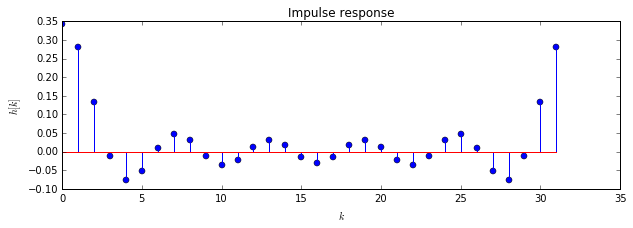

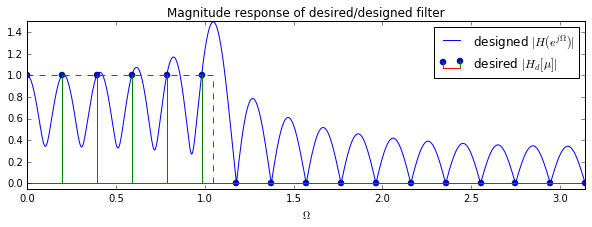

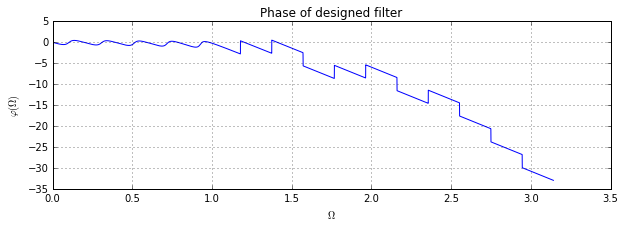

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

N = 32  # length of filter
Omc = np.pi/3  # corner frequency of low-pass

# specify desired frequency response
Ommu = 2*np.pi/N*np.arange(N)
Hd = np.zeros(N)
Hd[Ommu <= Omc] = 1
Hd[Ommu >= (2*np.pi-Omc)] = 1

# compute impulse response of filter
h = np.fft.ifft(Hd)
h = np.real(h)  # due to round-off errors
# compute frequency response of filter
Om, H = sig.freqz(h, worN=8192)

# plot impulse response
plt.figure(figsize = (10,3))
plt.stem(h)
plt.title('Impulse response')
plt.xlabel(r'$k$')
plt.ylabel(r'$h[k]$')
# plot transfer functions
plt.figure(figsize = (10,3))
plt.plot(Om, np.abs(H), 'b-', label=r'designed $|H(e^{j \Omega})|$')
plt.stem(Ommu, np.abs(Hd), 'g', label=r'desired $|H_d[\mu]|$')
plt.plot([0, Omc, Omc], [1, 1, 0], 'r--')
plt.title('Magnitude response of desired/designed filter')
plt.xlabel(r'$\Omega$')
plt.legend()
plt.axis([0, np.pi, -0.05, 1.5])
# plot phase
plt.figure(figsize = (10,3))
plt.plot(Om, np.unwrap(np.angle(H)))
plt.title('Phase of designed filter')
plt.xlabel(r'$\Omega$')
plt.ylabel(r'$\varphi(\Omega)$')
plt.grid()

**Exercises**

* What phase behavior does the designed filter have?
* Increase the length `N` of the filter. Does the attenuation in the stop-band improve?

The reason for the poor perfomance of the designed filter is the zero-phase of the desired transfer function which cannot be realized by a causal non-recursive system. This was [already discussed for the window method](../filter_design/window_method.ipynb#Zero-Phase-Filters). In comparison to the window method, the freqeuncy sampling method suffers from addtional time-domain aliasing due to the periodicy of the DFT. Again a linear-phase design is better in such situations.

### Design of Linear-Phase Filters

The design of non-recursive FIR filters with a linear phase is often desired due to their constant group delay. As for the [window method](../filter_design/window_method.ipynb), the design of a digital filter with a generalized linear phase is considered in the following. For $|\Omega| < \pi$ its transfer function is given as

\begin{equation}
H_\text{d}(\mathrm{e}^{\,\mathrm{j}\,\Omega}) = A(\mathrm{e}^{\,\mathrm{j}\,\Omega}) \cdot \mathrm{e}^{\,-\mathrm{j} \alpha \Omega + \mathrm{j} \beta}
\end{equation}

where $A(\mathrm{e}^{\,\mathrm{j}\,\Omega}) \in \mathbb{R}$ denotes the amplitude of the filter, $-\alpha\,\Omega$ its linear phase and $\beta$ a constant phase offset. The impulse response $h[k]$ of a linear-phase filter shows specific symmetries which have already been discussed for the [design of linear-phase filters using the window method](../filter_design/window_method.ipynb#Causal-Linear-Phase-Filters). For the resulting four types of linear-phase FIR filters, the properties of $A(\mathrm{e}^{\,\mathrm{j}\,\Omega})$ and the values of $\alpha$ and $\beta$ have to be chosen accordingly for the formulation of $H_\text{d}(\mathrm{e}^{\,\mathrm{j}\,\Omega})$ and $H_d[\mu]$, respectively. This is illustrated in the following for the design of a low-pass filter.

#### Example: Linear-phase approximation of an ideal low-pass

We aim at the approximation of an ideal low-pass as a linear-phase non-recursive FIR filter. For the sake of comparison with a similar [example for the window method](../filter_design/window_method.ipynb#Example:-Causal-linear-phase-approximation-of-ideal-low-pass), we choose a type 1 filter with odd filter length $N$, $\alpha = \frac{N-1}{2}$ and $\beta = 0$. The desired frequency response $H_\text{d}[\mu]$ is given by sampling

\begin{equation}
H_\text{d}(\mathrm{e}^{\,\mathrm{j}\,\Omega}) = \mathrm{e}^{\,-\mathrm{j} \frac{N-1}{2} \Omega} \cdot \begin{cases}
1 & \text{for } |\Omega| \leq \Omega_\text{c} \\
0 & \text{otherwise}
\end{cases}
\end{equation}

which is defined for $|\Omega| < \pi$. Note that for sampling on the unit circle with $0 \leq \Omega < 2 \pi$, the periodicity $H_\text{d}(\mathrm{e}^{\,\mathrm{j}\,\Omega}) = H_\text{d}(\mathrm{e}^{\,\mathrm{j}(\Omega+ n 2 \pi)})$ for $n \in \mathbb{Z}$ has to be considered.

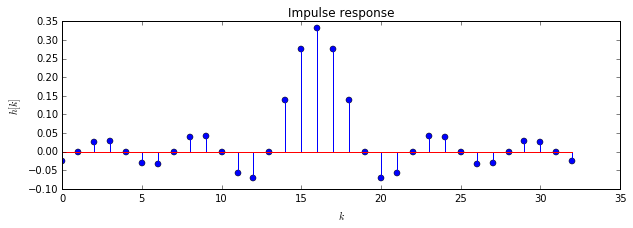

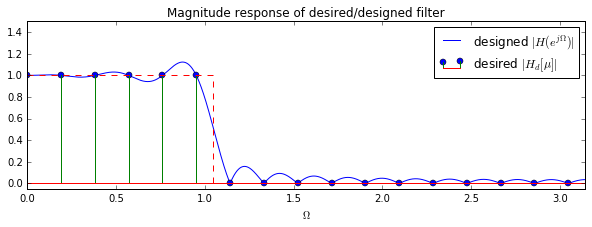

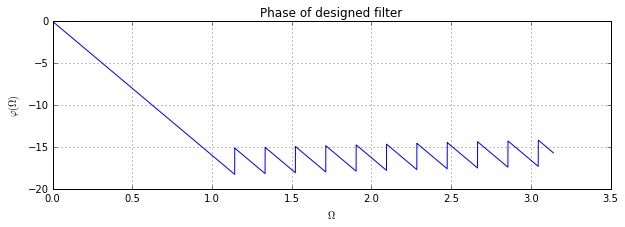

In [2]:
N = 33  # length of filter
Omc = np.pi/3  # corner frequency of low-pass

# specify desired frequency response
Ommu = 2*np.pi/N*np.arange(N)
Hd = np.zeros(N)
Hd[Ommu < Omc] = 1
Hd[Ommu > (2*np.pi-Omc)] = 1
Hd = Hd * np.exp(-1j*Ommu*(N-1)/2)

# compute impulse response of filter
h = np.fft.ifft(Hd)
h = np.real(h)  # due to round-off errors
# compute frequency response of filter
Om, H = sig.freqz(h, worN=8192)

# plot impulse response
plt.figure(figsize = (10,3))
plt.stem(h)
plt.title('Impulse response')
plt.xlabel(r'$k$')
plt.ylabel(r'$h[k]$')
# plot frequency response
plt.figure(figsize = (10,3))
plt.plot(Om, np.abs(H), 'b-', label=r'designed $|H(e^{j \Omega})|$')
plt.stem(Ommu, np.abs(Hd), 'g', label=r'desired $|H_d[\mu]|$')
plt.plot([0, Omc, Omc], [1, 1, 0], 'r--')
plt.title('Magnitude response of desired/designed filter')
plt.xlabel(r'$\Omega$')
plt.legend()
plt.axis([0, np.pi, -0.05, 1.5])
# plot phase
plt.figure(figsize = (10,3))
plt.plot(Om, np.unwrap(np.angle(H)))
plt.title('Phase of designed filter')
plt.xlabel(r'$\Omega$')
plt.ylabel(r'$\varphi(\Omega)$')
plt.grid()

**Exercises**

* Does the designed filter have the desired linear phase?
* Increase the length `N` of the filter. What is different to the previous example?
* How could the method be modified to change the properties of the frequency response?

### Comparison to Window Method

For a comparison of the frequency sampling to the [window method](../filter_design/window_method.ipynb) it is assumed that the desired frequency response $H_\text{d}(\mathrm{e}^{\,\mathrm{j}\,\Omega})$ is given. For both methods, the coefficients $h[k]$ of an FIR approximation are computed as follows

1. Window Method
\begin{align}
h_\text{d}[k] &= \mathcal{F}_{*}^{-1} \{ H_\text{d}(\mathrm{e}^{\,\mathrm{j}\,\Omega}) \} \\
h[k] &= h_\text{d}[k] \cdot w[k]
\end{align}

2. Frequency Sampling Method
\begin{align}
H_\text{d}[\mu] &= H_\text{d}(\mathrm{e}^{\,\mathrm{j} \frac{2 \pi}{N} \mu}) \\
h[k] &= \text{DFT}_N^{-1} \{ H_\text{d}[\mu] \}
\end{align}

For finite lengths $N$, the difference between both methods is related to the periodicity of the DFT. For a desired frequency response $H_\text{d}(\mathrm{e}^{\,\mathrm{j}\,\Omega})$ which does not result in a FIR $h_\text{d}[k]$ of length $N$, the inverse DFT in the frequency sampling method will suffer from time-domain aliasing. In the general case, filter coefficients computed by the window and frequency sampling method will hence differ.

However, for a rectangular window $w[k]$ and $N \to \infty$ both methods will become equivalent. This reasoning motivates an oversampled frequency sampling method, where $H_\text{d}(\mathrm{e}^{\,\mathrm{j}\,\Omega})$ is sampled at $M \gg N$ points in order to derive an approximation of $h_\text{d}[k]$ which is then windowed to the target length $N$. The method is beneficial in cases where a closed-form inverse DTFT of $H_\text{d}(\mathrm{e}^{\,\mathrm{j}\,\Omega})$, as required for the window method, cannot be found.

#### Example: Oversampled frequency sampling method

We consider the design of a linear-phase approximation of an ideal low-pass filter using the oversampled frequency sampling method. For the sake of comparison, the parameters have been chosen in accordance to a [similar example using the window method](../filter_design/window_method.ipynb#Example:-Causal-linear-phase-approximation-of-ideal-low-pass). Using $H_\text{d}(\mathrm{e}^{\,\mathrm{j}\,\Omega})$ from the previous example in this section, the filter is computed by

1. (Over)-Sampling the desired response at $M$ frequencies
\begin{equation}
H_\text{d}[\mu] = H_\text{d}(\mathrm{e}^{\,\mathrm{j} \frac{2 \pi}{M} \mu})
\end{equation}

2. Inverse DFT of length $M$
\begin{equation}
h[k] = \text{DFT}_M^{-1} \{ H_\text{d}[\mu] \}
\end{equation}

3. Windowing to desired length $N$
\begin{equation}
h[k] = h_\text{d}[k] \cdot w[k]
\end{equation}



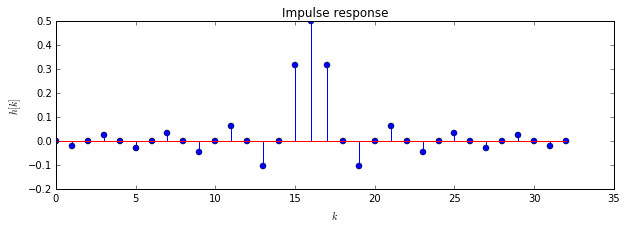

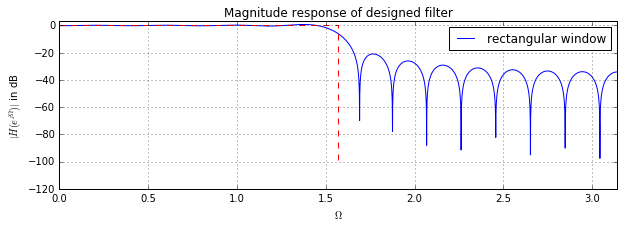

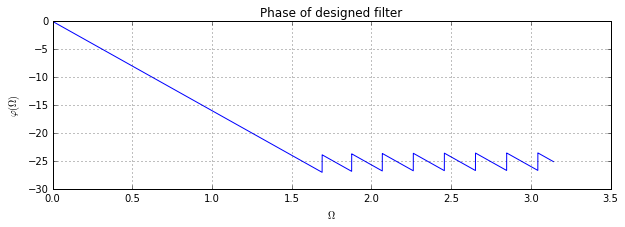

In [3]:
N = 33  # length of filter
M = 8192  #
Omc = np.pi/2  # corner frequency of low-pass

# specify desired frequency response
Ommu = 2*np.pi/M*np.arange(M)
Hd = np.zeros(M)
Hd[Ommu < Omc] = 1
Hd[Ommu > (2*np.pi-Omc)] = 1
Hd = Hd * np.exp(-1j*Ommu*(N-1)/2)

# compute impulse response of filter
h = np.fft.ifft(Hd)
h = np.real(h)  # due to round-off errors
h = h[0:N]  # rectangular window
# compute frequency response of filter
Om, H = sig.freqz(h, worN=8192)

# plot impulse response
plt.figure(figsize = (10,3))
plt.stem(h)
plt.title('Impulse response')
plt.xlabel(r'$k$')
plt.ylabel(r'$h[k]$')
# plot frequency response
plt.figure(figsize = (10,3))
plt.plot(Om, 20 * np.log10(abs(H)), label='rectangular window')
plt.plot([0, Omc, Omc], [0, 0, -100], 'r--')
plt.title('Magnitude response of designed filter')
plt.xlabel(r'$\Omega$')
plt.ylabel(r'$|H(e^{j \Omega})|$ in dB')
plt.axis([0, np.pi, -120, 3])
plt.legend()
plt.grid()
# plot phase
plt.figure(figsize = (10,3))
plt.plot(Om, np.unwrap(np.angle(H)))
plt.title('Phase of designed filter')
plt.xlabel(r'$\Omega$')
plt.ylabel(r'$\varphi(\Omega)$')
plt.grid()

**Exercises**

* Compare the designed filter and its properties to the [same design using the window method](../filter_design/window_method.ipynb#Example:-Causal-linear-phase-approximation-of-ideal-low-pass)
* Change the number of samples `M` used for sampling the desired response. What changes if you increase/decrease `M`?

**Copyright**

<p xmlns:dct="http://purl.org/dc/terms/">
  <a rel="license"
     href="http://creativecommons.org/publicdomain/zero/1.0/">
    <img src="http://i.creativecommons.org/p/zero/1.0/88x31.png" style="border-style: none;" alt="CC0" />
  </a>
  <br />
  To the extent possible under law,
  <span rel="dct:publisher" resource="[_:publisher]">the person who associated CC0</span>
  with this work has waived all copyright and related or neighboring
  rights to this work.
</p>